<a href="https://colab.research.google.com/github/sidmahurkar/Sentiment-Analysis-on-Abrogation-of-Article-370/blob/master/senti_using_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import io
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
from collections import Counter
from PIL import Image
import numpy as np
import urllib
import requests

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.chdir("/content/gdrive/My Drive")

In [0]:
with open('twit525.json') as json_file:
    twitter = json.load(json_file)

In [0]:
tweets = []
for tweet_info in twitter:
  tweet = tweet_info['text']
  tweets.append(tweet)

In [0]:
time_of_tweets = []
for tweet_info in twitter:
  time = tweet_info['timestamp']
  time_of_tweets.append(time)

In [0]:
retweets = []
for tweet_info in twitter:
  retweet = tweet_info['retweets']
  retweets.append(retweet)

In [0]:
number_of_words = []
for i in range(len(tweets)):
  number_of_words.append(len(tweets[i].split(' ')))

In [0]:
tweet = pd.DataFrame(list(zip(tweets, retweets, time_of_tweets,number_of_words)), 
               columns =['text', 'retweet','created','number_of_words']) 

In [36]:
tweet.head()

,text,retweet,created,number_of_words
0,#KashmirWithModi\nWith the scrapping of Articl...,0,2019-08-14T23:58:46,29
1,#SACREDGAMES2 #Article370 #15AugustBlackDay,0,2019-08-14T23:57:31,3
2,Black day in remembrance of intelligence blund...,0,2019-08-14T23:56:14,18
3,1. Pakistan has changed the demographics with ...,0,2019-08-14T23:55:25,45
4,"BJP's Animated Explainer On ""How Article 370 W...",0,2019-08-14T23:54:22,15


In [0]:
tweet['hour'] = pd.DatetimeIndex(tweet['created']).hour
tweet['date'] = pd.DatetimeIndex(tweet['created']).date
tweet['minute'] = pd.DatetimeIndex(tweet['created']).minute
tweet['day'] = pd.DatetimeIndex(tweet['created']).day

In [38]:
tweet.head()

,text,retweet,created,number_of_words,hour,date,minute,day
0,#KashmirWithModi\nWith the scrapping of Articl...,0,2019-08-14T23:58:46,29,23,2019-08-14,58,14
1,#SACREDGAMES2 #Article370 #15AugustBlackDay,0,2019-08-14T23:57:31,3,23,2019-08-14,57,14
2,Black day in remembrance of intelligence blund...,0,2019-08-14T23:56:14,18,23,2019-08-14,56,14
3,1. Pakistan has changed the demographics with ...,0,2019-08-14T23:55:25,45,23,2019-08-14,55,14
4,"BJP's Animated Explainer On ""How Article 370 W...",0,2019-08-14T23:54:22,15,23,2019-08-14,54,14


In [39]:
from nltk import tokenize
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
# Lemmatize the Text
from nltk.stem import WordNetLemmatizer
tweet['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweet['text']]

In [41]:
tweet.head()

,text,retweet,created,number_of_words,hour,date,minute,day,text_lem
0,#KashmirWithModi\nWith the scrapping of Articl...,0,2019-08-14T23:58:46,29,23,2019-08-14,58,14,KashmirWithModi With the scrapping of Article ...
1,#SACREDGAMES2 #Article370 #15AugustBlackDay,0,2019-08-14T23:57:31,3,23,2019-08-14,57,14,SACREDGAMES Article AugustBlackDay
2,Black day in remembrance of intelligence blund...,0,2019-08-14T23:56:14,18,23,2019-08-14,56,14,Black day in remembrance of intelligence blund...
3,1. Pakistan has changed the demographics with ...,0,2019-08-14T23:55:25,45,23,2019-08-14,55,14,Pakistan has changed the demographics with man...
4,"BJP's Animated Explainer On ""How Article 370 W...",0,2019-08-14T23:54:22,15,23,2019-08-14,54,14,BJP s Animated Explainer On How Article W...


In [42]:
sid = SentimentIntensityAnalyzer()

tweet['sentiment_compound_polarity']=tweet.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweet['sentiment_neutral']=tweet.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweet['sentiment_negative']=tweet.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweet['sentiment_pos']=tweet.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweet['sentiment_type']=''
tweet.loc[tweet.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweet.loc[tweet.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweet.loc[tweet.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweet.head()

,text,retweet,created,number_of_words,hour,date,minute,day,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,#KashmirWithModi\nWith the scrapping of Articl...,0,2019-08-14T23:58:46,29,23,2019-08-14,58,14,KashmirWithModi With the scrapping of Article ...,0.5859,0.854,0.000,0.146,POSITIVE
1,#SACREDGAMES2 #Article370 #15AugustBlackDay,0,2019-08-14T23:57:31,3,23,2019-08-14,57,14,SACREDGAMES Article AugustBlackDay,0.0000,1.000,0.000,0.000,NEUTRAL
2,Black day in remembrance of intelligence blund...,0,2019-08-14T23:56:14,18,23,2019-08-14,56,14,Black day in remembrance of intelligence blund...,0.8860,0.634,0.000,0.366,POSITIVE
3,1. Pakistan has changed the demographics with ...,0,2019-08-14T23:55:25,45,23,2019-08-14,55,14,Pakistan has changed the demographics with man...,0.2924,0.953,0.000,0.047,POSITIVE
4,"BJP's Animated Explainer On ""How Article 370 W...",0,2019-08-14T23:54:22,15,23,2019-08-14,54,14,BJP s Animated Explainer On How Article W...,-0.7906,0.781,0.219,0.000,NEGATIVE


In [0]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweet.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentnt = tweet.groupby(['sentiment_type']).count()

In [44]:
tweets_sentiment

sentiment_type
NEGATIVE     57791
NEUTRAL     113650
POSITIVE    110831
Name: sentiment_neutral, dtype: int64

Text(0.5, 1.0, 'Sentiment Analysis 1')

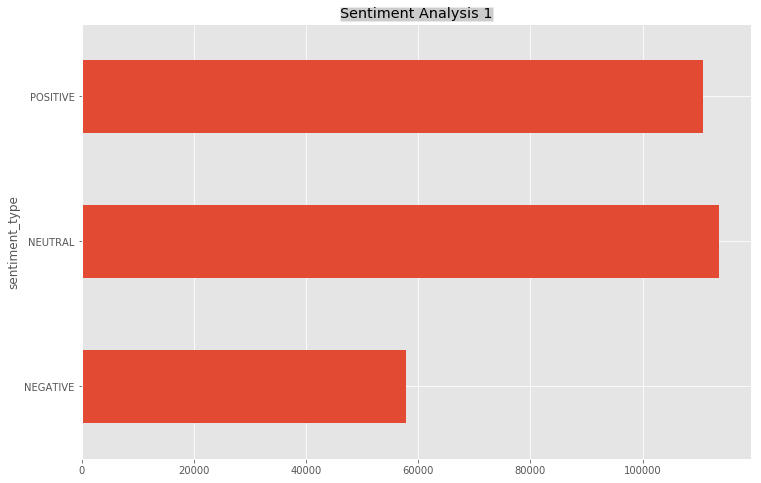

In [45]:
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
# plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(12, 8))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
# plt.subplot(222)


Text(0.5, 1.0, 'Sentiment Analysis 2')

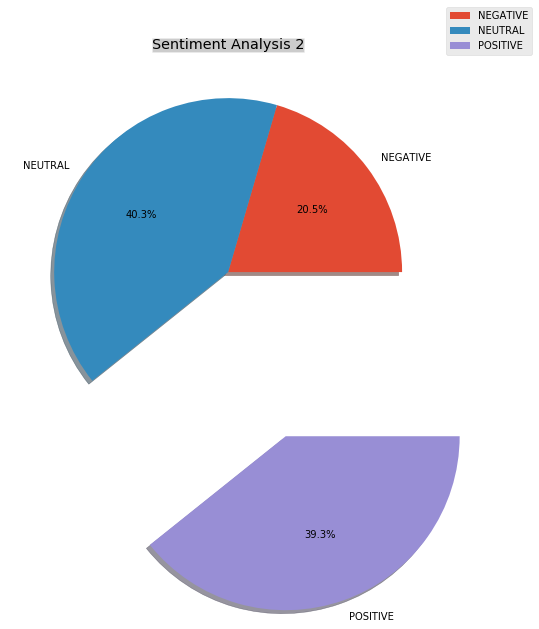

In [46]:
tweets_sentiment.plot(kind='pie',figsize=(12, 8),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})

In [47]:
tweet['count'] = 1
tweets_filtered = tweet[['hour', 'sentiment_type', 'count']]
pivot_tweets = tweets_filtered.pivot_table(tweets_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)
print(pivot_tweets.head())

                     count
sentiment_type hour       
NEGATIVE       0       395
               1       589
               2       879
               3      1202
               4      1476


Text(0.5, 1.0, 'Evolution of sentiments by hour')

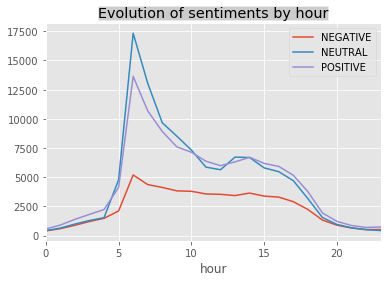

In [50]:
sentiment_type = pivot_tweets.index.get_level_values(0).unique()
# f, ax = plt.subplots(2, 1, figsize=(8, 10))
# plt.setp(ax, xticks=list(range(0,24)))

for sentiment_type in sentiment_type:
    split = pivot_tweets.xs(sentiment_type)
    split["count"].plot( legend=True, label='' + str(sentiment_type))
plt.title('Evolution of sentiments by hour', bbox={'facecolor':'0.8', 'pad':0}) 